In [37]:
alex = "./alex_inter_anns_full.conll"
simon = "./simon_inter_anns_full.conll"
ivett = "./ivett_inter_anns_full.conll"

In [38]:
def splitData(filepath):
    splittedData = {"words": [], "ner_tags": [], "cultural_tags": []}

    with open(filepath, "r") as inF: 
        lines = inF.readlines() 

    for line in lines:
        components = line.strip().split()
        if len(components) == 0: 
            continue

        splittedData["words"].append(components[0])
        splittedData["ner_tags"].append(components[1])

        if len(components) > 3: 
            splittedData["cultural_tags"].append(" ".join(components[2:]))
        else: 
            splittedData["cultural_tags"].append(components[2])
    
    return splittedData

In [39]:
alex = splitData(alex)
simon = splitData(simon)
ivett = splitData(ivett)

In [40]:
def interAccuracy(firstAnnotator, secondAnnotator): 
    nerScore = 0 
    culturalScore = 0

    # inter accuracy for NER tags
    for i in range(len(firstAnnotator["ner_tags"])):
        if firstAnnotator["ner_tags"][i] == secondAnnotator["ner_tags"][i]: 
            nerScore += 1

    nerScore /= len(firstAnnotator["ner_tags"])

    # inter accuracy for cultural tags
    for i in range(len(firstAnnotator["cultural_tags"])):
        if firstAnnotator["cultural_tags"][i] == secondAnnotator["cultural_tags"][i]: 
            culturalScore += 1

    culturalScore /= len(firstAnnotator["cultural_tags"])
    

    return nerScore, culturalScore

In [ ]:
AlSi = interAccuracy(alex, simon)
AlIv = interAccuracy(alex, ivett)
IvSi  = interAccuracy(ivett, simon)


# Average inter-annotator accuracies 
nerScores = [AlSi[0], AlIv[0], IvSi[0]]
culturalScores = [AlSi[1], AlIv[1], IvSi[1]]

nerAvg = sum(nerScores)/3
culturalAvg = sum(culturalScores)/3

In [ ]:
"""print("Inter-annotator accuracy for Alex & Simon:\n")
print(f"- NER: {AlSi[0]:.3f}\n- Cultural tags: {AlSi[1]:.3f}\n\n")

print("Inter-annotator accuracy for Alex & Ivett:\n")
print(f"- NER: {AlIv[0]:.3f}\n- Cultural tags: {AlIv[1]:.3f}\n\n")

print("Inter-annotator accuracy for Ivett & Simon:\n")
print(f"- NER: {IvSi[0]:.3f}\n- Cultural tags: {IvSi[1]:.3f}\n\n")

print("Average inter-annotator accuracy: ")
print(f"- NER: {nerAvg:.3f}\n- Cultural tags: {culturalAvg:.3f}")"""

Inter-annotator accuracy for Alex & Simon:

- NER: 0.973
- Cultural tags: 0.967


Inter-annotator accuracy for Alex & Ivett:

- NER: 0.983
- Cultural tags: 0.970


Inter-annotator accuracy for Ivett & Simon:

- NER: 0.986
- Cultural tags: 0.992


Average inter-annotator accuracy: 
- NER: 0.981
- Cultural tags: 0.976


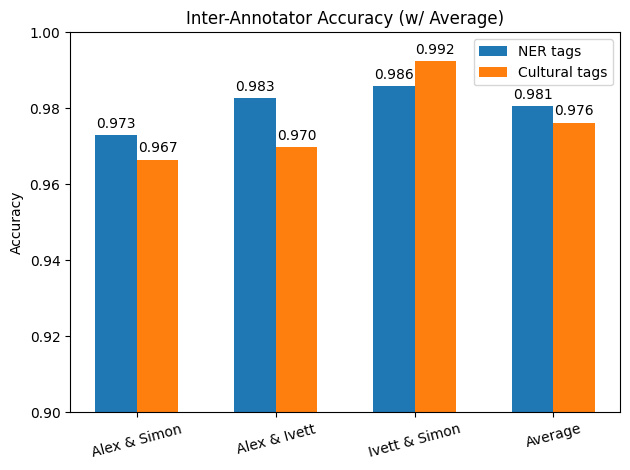

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# data to plot
annPairs = ['Alex & Simon', 'Alex & Ivett', 'Ivett & Simon']

annPairs.append('Average')
nerScores.append(nerAvg)
culturalScores.append(culturalAvg)

# Build plot figure
x = np.arange(len(annPairs))
width = 0.3

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, nerScores, width, label='NER tags')
bars2 = ax.bar(x + width/2, culturalScores, width, label='Cultural tags')

# Labels
ax.set_ylabel('Accuracy')
ax.set_title('Inter-Annotator Accuracy (w/ Average)')
ax.set_xticks(x)
ax.set_xticklabels(annPairs, rotation=15)
ax.set_ylim(0.9, 1.0)
ax.legend()

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()